In [1]:
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import numpy as np
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from joblib import dump, load

In [2]:
df = pd.read_csv('CreditNumeric.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df = df.drop(['Gender', 'Student', 'Married', 'Ethnicity'], axis=1)
df.head()

,Income,Limit,Rating,Cards,Age,Education,Balance,GenderNumeric,StudentNumeric,MarriedNumeric,EthnicityNumeric
0,14.891,3606,283,2,34,11,333,1,0,1,1
1,106.025,6645,483,3,82,15,903,0,1,1,2
2,104.593,7075,514,4,71,11,580,1,0,0,2
3,148.924,9504,681,3,36,11,964,0,0,0,2
4,55.882,4897,357,2,68,16,331,1,0,1,1


In [3]:
df["Rating_Y"] = df.loc[:, "Rating"]
df.loc[df["Rating_Y"]< 240, "Rating_Y" ] = 0 # nie dostanie
df.loc[(df["Rating_Y"]>= 240) &  (df["Rating_Y"]<= 299), "Rating_Y" ] = 1 # do weryfikacji
df.loc[df["Rating_Y"]> 299, "Rating_Y" ] = 2 # dostanie kredyt
df.head()

,Income,Limit,Rating,Cards,Age,Education,Balance,GenderNumeric,StudentNumeric,MarriedNumeric,EthnicityNumeric,Rating_Y
0,14.891,3606,283,2,34,11,333,1,0,1,1,1
1,106.025,6645,483,3,82,15,903,0,1,1,2,2
2,104.593,7075,514,4,71,11,580,1,0,0,2,2
3,148.924,9504,681,3,36,11,964,0,0,0,2,2
4,55.882,4897,357,2,68,16,331,1,0,1,1,2


In [4]:
#list_ratings = []
#for i, r in df.iterrows():
#    if  df.loc[i,'Rating'] >= 300:
#        list_ratings.append(1)
#    if  df.loc[i,'Rating'] < 300:
#        list_ratings.append(0)
#print(list_ratings)

In [5]:
# df.to_csv(index=True, header=True)

In [6]:
corr = df.corr()

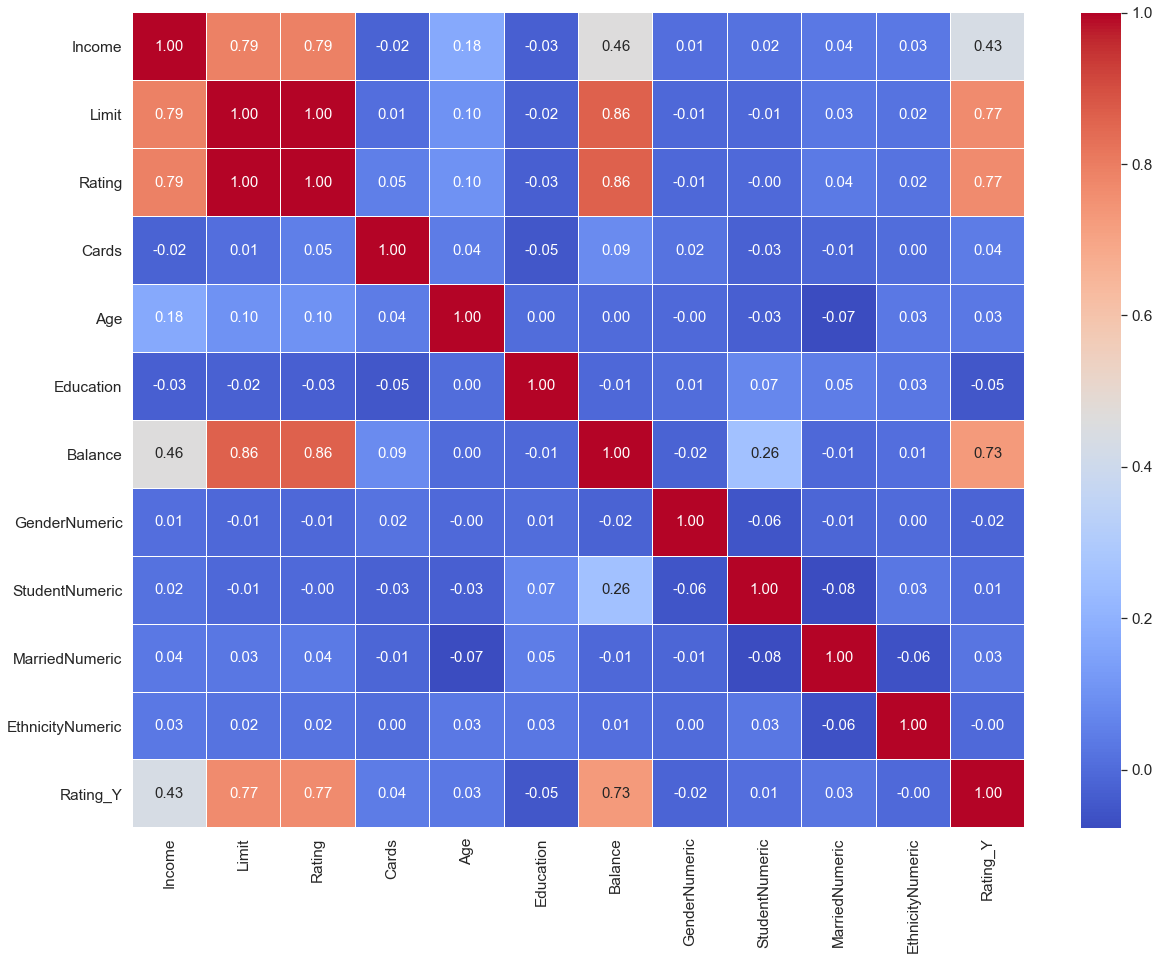

In [7]:
sns.set(font_scale=1.4)
fig, (ax) = plt.subplots(figsize=(20,15))
matrix = sns.heatmap(corr, 
                 ax=ax,
                 cmap="coolwarm",
                 annot=True,
                 fmt='.2f',
                 annot_kws={"size": 15},
                 linewidths=.05)

### Rating

#### Model

In [8]:
df_x_rating = df.drop(['Rating', 'Limit', 'Cards', 'Rating_Y'], axis=1)
df_y_rating = df['Rating']
x_rating = df_x_rating.values
y_rating = df_y_rating.values

In [9]:
x_train_rating, x_test_rating, y_train_rating, y_test_rating = train_test_split(x_rating, y_rating, test_size=0.2,
                                                                                random_state=7)

In [10]:
scaler = StandardScaler()
scaler.fit(x_rating)
x_train_rating_scaler = scaler.transform(x_train_rating)
x_test_rating_scaler = scaler.transform(x_test_rating)

In [11]:
#dump(scaler, 'svr_scaler_rating.joblib')

In [12]:
#c_range = np.arange(0.1, 10.1, 0.1)
#gamma_range = np.arange(0.01, 1.01, 0.01)
#params = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': c_range, 'gamma': gamma_range}

In [13]:
#model = SVR()

In [14]:
#random_search = RandomizedSearchCV(model, param_distributions=params, random_state=7, cv=5, n_jobs=-1, verbose=1)

In [15]:
#random_search.fit(x_train_rating_scaler, y_train_rating)

In [16]:
#print(random_search.best_score_)

In [17]:
#print(random_search.best_params_)

In [18]:
model_rating = SVR(kernel='linear', gamma=0.36, C=8.6)

In [19]:
model_rating.fit(x_train_rating_scaler, y_train_rating)

SVR(C=8.6, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.36,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [20]:
scores_rating = cross_val_score(model_rating, x_train_rating_scaler, y_train_rating, cv=5, verbose=1, n_jobs=-1)
score_cv_rating = scores_rating.mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.2s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished


In [21]:
print(score_cv_rating)

0.9710913474241709


In [22]:
preds_rating = model_rating.predict(x_test_rating_scaler)
mse_rating = mean_squared_error(y_test_rating, preds_rating)
print(np.sqrt(np.abs(mse_rating)))

31.07925242601216


In [23]:
score_model_rating = model_rating.score(x_test_rating_scaler, y_test_rating)
print(score_model_rating)

0.9513438257217901


In [24]:
#dump(model_rating, 'svr_model_rating.joblib')

In [25]:
#model_rating = load('svr_model_rating.joblib')

#### Predykcja

In [26]:
print(list(df_x_rating.columns))

['Income', 'Age', 'Education', 'Balance', 'GenderNumeric', 'StudentNumeric', 'MarriedNumeric', 'EthnicityNumeric']


In [27]:
income = 14.890
limit = 0
balance = 333
cards = 0
age = 34
education = 11
gender = 1
student = 0
married = 1
ethnicity = 1

In [28]:
x_new_rating = [[income, age, balance, education, gender, student, married, ethnicity]]

In [29]:
x_new_rating_scaler = scaler.fit_transform(x_new_rating)
y_new_rating = model_rating.predict(x_new_rating_scaler)

In [30]:
rating = int(y_new_rating)
print(df_y_rating.name, ':', rating)

Rating : 361


### Limit

#### Model

In [31]:
df_x_limit = df.drop(['Limit', 'Balance', 'Cards'], axis=1)
df_y_limit = df['Limit']
x_limit = df_x_limit.values
y_limit = df_y_limit.values

In [32]:
x_train_limit, x_test_limit, y_train_limit, y_test_limit = train_test_split(x_limit, y_limit, test_size=0.2,
                                                                                random_state=7)

In [33]:
scaler.fit(x_limit)
x_train_limit_scaler = scaler.transform(x_train_limit)
x_test_limit_scaler = scaler.transform(x_test_limit)

In [34]:
#dump(scaler, 'svr_scaler_limit.joblib')

In [35]:
#random_search.fit(x_train_limit_scaler, y_train_limit)

In [36]:
#print(random_search.best_score_)

In [37]:
#print(random_search.best_params_)

In [38]:
model_limit = SVR(kernel='linear', gamma=0.36, C=8.6)

In [39]:
model_limit.fit(x_train_limit_scaler, y_train_limit)

SVR(C=8.6, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.36,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [40]:
scores_limit = cross_val_score(model_limit, x_train_limit_scaler, y_train_limit, cv=5, verbose=1, n_jobs=-1)
score_cv_limit = scores_rating.mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


In [41]:
print(score_cv_limit)

0.9710913474241709


In [42]:
preds_limit = model_limit.predict(x_test_limit_scaler)
mse_limit = mean_squared_error(y_test_limit, preds_limit)
print(np.sqrt(np.abs(mse_limit)))

411.81684861603037


In [43]:
score_model_limit = model_limit.score(x_test_limit_scaler, y_test_limit)
print(score_model_limit)

0.9610375834963141


In [44]:
#dump(model_limit, 'svr_model_limit.joblib')

In [45]:
#model_limit = load('svr_model_limit.joblib')

#### Predykcja

In [46]:
print(list(df_x_limit.columns))

['Income', 'Rating', 'Age', 'Education', 'GenderNumeric', 'StudentNumeric', 'MarriedNumeric', 'EthnicityNumeric', 'Rating_Y']


In [47]:
x_new_limit = [[income, rating, age, education, gender, student, married, ethnicity, 2]]

In [48]:
x_new_limit_scaler = scaler.transform(x_new_limit)
y_new_limit = model_limit.predict(x_new_limit_scaler)

#### Wyniki

In [49]:
rating = int(y_new_rating)
print(df_y_rating.name, ':', rating)

Rating : 361


In [50]:
limit = int(y_new_limit)
print(df_y_limit.name, ':', limit)

Limit : 4783
